<center><img src='https://github.com/MateusPincho/Projeto-Filtros-Ativos/blob/master/docs/logo.png?raw=true'/></center>

<h1 align = 'center'>Trabalho de Circuitos Elétricos II<h1/>
<h2 align = 'center'>Projeto de Filtro Ativo<h2/>
 

Este projeto tem como objetivo o estudo referente ao dimensionamento de um Filtro Ativo. O projeto está salvo e disponível para consulta em nosso [repositório](https://github.com/MateusPincho/Projeto-Filtros-Ativos/tree/master).

Projetistas:

- André Vitor Cadena de Oliveira
- Fábio Augusto Almeida Marçal
- Gabriel Nazário Gonçalves
- Lorenzo Carrera de Oliveira
- Mateus Pincho de Oliveira

---

In [30]:
# Importando os módulos utilizados...
import numpy as np
from scipy import signal
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Instruções

Projete um filtro **Multiple Feedback Passa-Alta** com as seguintes características: 
- Frequência de Corte = $8 \text{ kHz}$
- Ganho na Faixa de Passagem: $2,2 \text{ V/V}$ ou $6,85 \text{ dB}$ 

Caso não encontre os dispositivos eletrônicos adequados para projeto do filtro acimaindicado, realize o projeto do filtro mais próximo possível, de acordo com os componentes encontrados, e indique a escolha com justificativa.

---

## Questão 1

Apresente a função de transferência do circuito e o memorial de cálculo da escolha dos componentes para a montagem do seguinte **Filtro Ativo**:

<center><img src='https://github.com/MateusPincho/Projeto-Filtros-Ativos/blob/master/docs/esquematico.png?raw=true'/></center>

---

### Memorial de Cálculo para o Filtro Ativo

Sendo a frequência de corte deseja de $8 \text{ kHz}$, então $w_0 = 2\pi\cdot8\cdot 10^3 = 50,26 \text{ krad/s}$. 

O ganho na faixa de passagem $H$ do filtro é especificado nas instruções e deve ser igual a $2,2$ .

Escolhendo $C_1$ como $68 \text{ nF}$, então: 

$$k = 2\pi\cdot8\text{k}\cdot68\text{n} = 3,41\cdot10^{-3}$$
$$C_3 = C_1 = 68 \text{ nF}$$
$$C_4 = \frac{68\text{n}}{2,2} = 30,91 \text{ nF}$$

Este filtro utilizará a aproximação de um *Filtro Butterworth*, onde a frequência central $f_0$ coincide com a frequência de corte $f_c$. Para que isso seja válido, o fator de qualidade $Q$ deve ser exclusivamente igual a $\sqrt{2}/2$. Assim: 

$$\alpha=\frac{2}{\sqrt{2}}$$
$$R_2 = \frac{\frac{2}{\sqrt{2}}}{3,41\cdot10^{-3}(2+\frac{1}{2,2})} = 168,56 \space \Omega$$
$$R_5 = \frac{2,2(2+\frac{1}{2,2})}{\frac{2}{\sqrt{2}}\cdot3,41\cdot10^{-3}} = 1117,12 \space \Omega$$

Tendo em mente que

$$\frac{-Hs^2}{s^2+\alpha\omega_0s+w_0^2}$$ 

é a função de transferência para a topologia *Multiple Feedback*, temos que a função de transferência para o filtro projetado será: 

$$H(s) = \frac{V_{out}}{V_{in}} = \frac{-2,2s^2}{s^2+71.07\cdot10^3s+2,52\cdot10^9}$$

Sendo a variável complexa $s=j\omega$ .

Caso o filtro esteja se comportando como esperado, será esperado um ganho de $3,85 \text{ dB}$ na frequência de corte, tendo em mente que esse ganho é de $3 \text{ dB}$ **a menos** do que o ganho da faixa de passagem $(6,85 \text{ dB})$ .

---

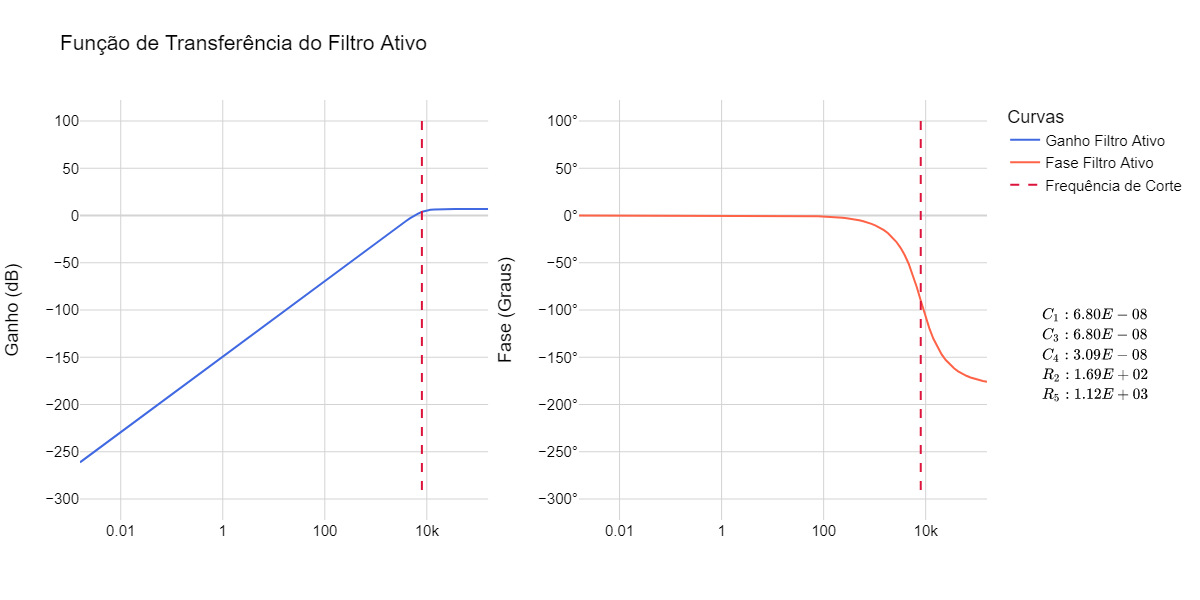

In [31]:
# Plotando a Função de Transferência do circuito (Diagrama de Bode)

# Parâmetros do Gráfico
fig = make_subplots(rows=1, cols=2)

fig.update_layout(
    title='Função de Transferência do Filtro Ativo',
    legend_title='Curvas',
    plot_bgcolor='white',
    font=dict(
        family='Arial',
        size=15,
        color='black'
    )
)

fig.update_xaxes(type='log',
                 gridcolor='lightgray')

for c, titulo in enumerate(['Ganho (dB)', 'Fase (Graus)']):
    fig.update_yaxes(title_text=titulo,
                     gridcolor='lightgray',
                     zerolinecolor='lightgray',
                     ticksuffix = '°'*c,
                     row=1, 
                     col=c+1
    )

# Parâmetros comportamentais do filtro ativo
f_0 = 8*1e3 # Frequência de corte
w_0 = 2*np.pi*f_0 # Conversão de Hz para rad/s
H = 2.2 # Ganho de passagem
Q = (2**0.5)/2 # Fator de qualidade

# Valores dos elementos capacitivos discretos 
C1 = 68*1e-9 # Escolha um valor arbitrário!
C3 = C1
C4 = C1/H

# Parâmetros auxiliares
k = w_0*C1
a = 1/Q

# Valores dos elementos resistivos discretos
R2 = a/(k*(2+1/H))
R5 = H*(2+1/H)/(a*k) 

MF_HP_A = signal.TransferFunction([-C1/C4, 0, 0], [1, (C1+C3+C4)/(C3*C4*R5), 1/(R2*R5*C3*C4)]) # Função de Transferência Atviva

w_a, ganho_a, fase_a = signal.bode(MF_HP_A)  # Retorna a frequência complexa w, a magnitude e a fase da função de transferência
freq_a = w_a/(2*np.pi) # Conversão de rad/s para Hz

for c, p in enumerate([['Ganho Filtro Ativo', 'royalblue', ganho_a], ['Fase Filtro Ativo', 'tomato', fase_a]]):
    fig.add_trace(go.Scatter(
        name=p[0],
        mode='lines', 
        line_color=p[1],
        x=freq_a, 
        y=p[2]
        ),
        row=1, 
        col=c+1
    )

    fig.add_trace(go.Scatter(
        showlegend=bool(c),
        name='Frequência de Corte',
        mode='lines',
        line_dash='dash', 
        line_color='crimson',
        x=[f_0, f_0], 
        y=[100, -300]
        ),
        row=1, 
        col=c+1
    )

fig.add_annotation(text=fr'$C_1: {C1:.2E}\\ C_3: {C3:.2E}\\ C_4: {C4:.2E}\\ R_2: {R2:.2E}\\ R_5: {R5:.2E}$', 
                   align='left',
                   showarrow=False,
                   xref='paper',
                   yref='paper',
                   x=1.18,
                   y=0.4
)

fig.show(renderer='png', width=1200, height=600)

## Questão 2

Para efeitos comparativos, plote a função de transferência do circuito junto com o **Filtro Passivo** de igual característica.

---

### Memorial de Cálculo do Filtro Passivo

Para isso, devemos encontrar a função de transferência de um filtro passivo passa-alta, com frequência de corte de $8 \text{ kHz}$ $(\omega_c = 50,26 \text{ krad/s})$. Escolhendo um circuito RC, a função de transferência do filtro é da forma

$$ H(s) = \frac{sRC}{1+sRC}$$

e sua frequência de corte $\omega_c$ igual a: 

$$ \omega_c = \frac{1}{RC}$$

Escolhendo $C = 68\text{ n}F $ , o resistor $R$ deve ser igual a: 

$$ 50,26\cdot 10^3 = \frac{1}{R\cdot 68\cdot 10^{-9}} $$
$$ R = 292,59 \space\Omega$$

A função de transferência do filtro passivo será: 

$$ H(s) = \frac{s\cdot 1,98\cdot10^{-5}}{s\cdot 1,98\cdot10^{-5}+1}$$

Caso o filtro esteja se comportando como esperado, será esperado um ganho de $-3 \text{ dB}$ na frequência de corte, tendo em mente que esse ganho é de $3 \text{ dB}$ **a menos** do que o ganho da faixa de passagem $(0 \text{ dB})$ .

---

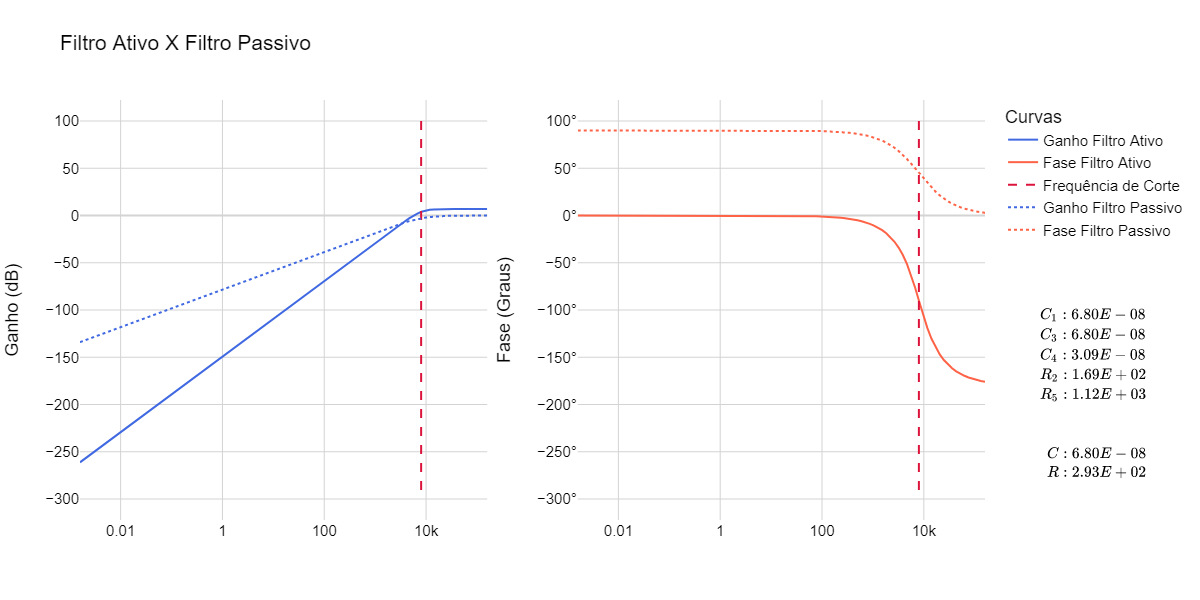

In [32]:
# Comparação das duas Funções de Transferência

# Parâmetros do Gráfico
fig.update_layout(
    title='Filtro Ativo X Filtro Passivo'
)

# Parâmetros comportamentais do filtro ativo
f_c = 8*1e3 # Frequência de corte
w_c = 2*np.pi*f_c # Conversão de Hz para rad/s

# Valores dos elementos capacitivos discretos 
C = 68*1e-9 # Escolha um valor arbitrário!
R = 1/(C*w_c)

MF_HP_P = signal.TransferFunction([R*C, 0], [R*C, 1]) # Função de Transferência Passiva

w_p, ganho_p, fase_p = signal.bode(MF_HP_P)  # Retorna a frequência complexa w, a magnitude e a fase da função de transferência
freq_p = w_p/(2*np.pi) # Conversão de rad/s para Hz

for c, p in enumerate([['Ganho Filtro', 'royalblue', ganho_p], ['Fase Filtro', 'tomato', fase_p]]):
    fig.add_trace(go.Scatter(
        name=p[0]+' Passivo',
        mode='lines', 
        line_dash='dot',
        line_color=p[1],
        x=freq_p, 
        y=p[2]
        ),
        row=1, 
        col=c+1
    )

fig.add_annotation(text=fr'$C: {C:.2E}\\ R: {R:.2E}$', 
                   align='left',
                   showarrow=False,
                   xref='paper',
                   yref='paper',
                   x=1.18,
                   y=0.1
)

fig.show(renderer='png', width=1200, height=600)

## Questão 3

Realize a montagem do filtro ativo em placa protoboard. Para tanto, utilize os componentes adequados, assim como as ligaçõoes e adequações necessárias para utilização do amplificador operacional conforme indicado no *datasheet*.

---

### Ajuste para Valores Comerciais

Ajustando os valores encontrados para componentes encontrados comercialmente, temos: 

| Componente | Valor Calculado        | Valor Comercial       |
| ---------- | ---------------------- | --------------------- |
| $C_1$      | $68 \text{ nF}$        | $68 \text{ nF}$       |
| $C_3$      | $68 \text{ nF}$        | $68 \text{ nF}$       |
| $C_4$      | $30,91 \text{ nF}$     | $33 \text{ nF}$       |
| $R_2$      | $168,56 \space\Omega$  | $160 \space\Omega$    |
| $R_5$      | $1117,12 \space\Omega$ | $1,1 \text{ k}\Omega$ |


---

### Montagem no Ambiente Virtual - *LTspice*

Antes da montagem real, será utilizada uma simulação SPICE utilizando os componentes comerciais e o amplificador operacional escolhido para obtermos uma noção mais sensível do que se aplicará na vida real. Para isso, utilizando os valores acima e o LM741 como *AmpOp*, monta-se a simulação disponível em [`..\simulation\`](https://github.com/MateusPincho/Projeto-Filtros-Ativos/tree/master/simulation).

<center><img src='https://github.com/MateusPincho/Projeto-Filtros-Ativos/blob/master/simulation/MFB-HPF-SCH.png?raw=true'/></center>

Executando uma simulação de análise AC, é possível gerar o seguinte **Diagrama de Bode** que reconfirma a análise da função de transferência num contexto mais condizente com a realidade.

Como revela-se abaixo, para valores próximos de $8 \text{ kHz}$, o ganho se aproxima de $3,85 \text{ dB}$, o ganho esperado para a frequência de corte do filtro.  

<center><img src='https://github.com/MateusPincho/Projeto-Filtros-Ativos/blob/master/simulation/MFB-HPF-BODE.png?raw=true'/></center>

---

### Montagem na Placa *Protoboard*

Com a simulação feita, o circuito foi montado numa placa *protoboard*. Todos os componentes comerciais foram utilizados como consta na tabela, exceto o resistor $R_2$, que foi composto por uma associação em série de um resistor de $150 \space\Omega$ com um resistor de $10 \space\Omega$. O *AmpOp* utilizado foi o TL074, um equivalente do LM741.   

<center><img src='https://github.com/MateusPincho/Projeto-Filtros-Ativos/blob/master/docs/montagem.png?raw=true'/></center>

---